<a href="https://colab.research.google.com/github/cesarsandiford/UNCC-Fintech-Project-2/blob/main/Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default Prediction

In [20]:
# Required imports
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

Load the Data Into a Pandas DataFrame

In [21]:
# Read in the CSV file as a Pandas Dataframe
from google.colab import files

csv_file = files.upload()

default_df = pd.read_csv("Default_loans.csv")

default_df.head()

Saving Default_loans.csv to Default_loans (2).csv


,Employed,Bank Balance,Annual Salary,Defaulted,Loan,Debt to Income,Age,Credit Score,Interest Rate
0,1,8754.36,532339.56,0,10700,19.48,67,758,7.672
1,0,9806.16,145273.56,0,8400,14.29,24,552,6.692
2,1,12882.60,381205.68,0,9000,11.63,26,834,6.963
3,1,6351.00,428453.88,0,10700,8.10,34,587,7.664
4,1,9427.92,461562.00,0,10800,14.97,37,602,7.698


In [22]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = default_df['Defaulted']

# Separate the X variable, the features
X = default_df.drop(columns='Defaulted')

In [23]:
# Review the X variable DataFrame
X

,Employed,Bank Balance,Annual Salary,Loan,Debt to Income,Age,Credit Score,Interest Rate
0,1,8754.36,532339.56,10700,19.48,67,758,7.672
1,0,9806.16,145273.56,8400,14.29,24,552,6.692
2,1,12882.60,381205.68,9000,11.63,26,834,6.963
3,1,6351.00,428453.88,10700,8.10,34,587,7.664
4,1,9427.92,461562.00,10800,14.97,37,602,7.698
...,...,...,...,...,...,...,...,...
995,0,8783.40,217409.16,8500,1.77,39,835,6.738
996,1,8613.72,384491.16,9600,20.28,45,602,7.219
997,0,12062.16,219146.16,9500,12.90,38,532,7.155
998,1,6743.16,374314.92,9900,14.79,23,611,7.342


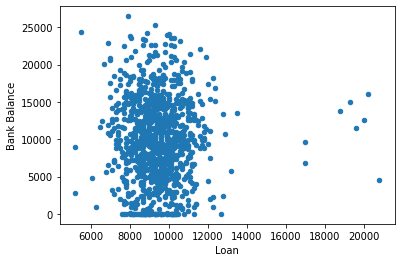

In [24]:
# Plot the clusters using the "bill_amt" and "pay_amt" columns
default_df.plot.scatter(
    x="Loan",
    y="Bank Balance"
    )

Check the balance of the labels variable (y) by using the value_counts function

In [25]:
# Check the balance of our target values
y.value_counts()

0    967
1     33
Name: Defaulted, dtype: int64

Split the data into training and testing datasets by using train_test_split

In [26]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# Instantiate the Logistic Regression model
lr = LogisticRegression(random_state=1)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)


Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model

In [28]:
# Make a prediction using the testing data
y_pred = lr.predict(X_test)

results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)

results

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
245,0,0
246,0,0
247,0,1
248,0,0


Evaluate the model’s performance

In [29]:
# Print the balanced_accuracy score of the model
print(balanced_accuracy_score(y_test, y_pred))

0.5812324929971989


In [30]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, y_pred))

[[237   1]
 [ 10   2]]


Classification Report Imbalanced

In [31]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.17      0.98      0.41      0.18       238
          1       0.67      0.17      1.00      0.27      0.41      0.15        12

avg / total       0.95      0.96      0.21      0.94      0.41      0.18       250



Predict a Logistic Regression Model with Resampled Training Data

In [32]:
# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [33]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

0    729
1    729
Name: Defaulted, dtype: int64

In [34]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
y_remsample_pred = lr.predict(X_test)

In [35]:
# Print the balanced_accuracy score of the model 
print(balanced_accuracy_score(y_test, y_remsample_pred))

0.8494397759103642


In [36]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, y_remsample_pred))

[[206  32]
 [  2  10]]


In [37]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_remsample_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.87      0.83      0.92      0.85      0.72       238
          1       0.24      0.83      0.87      0.37      0.85      0.72        12

avg / total       0.95      0.86      0.83      0.90      0.85      0.72       250

